The aim is to predict potential
driver churn using multiple attributes to
maintain a consistent driver base and
ensure business continuity.

By Nikhil Mehalawat
email id : nikhilmehalawat@gmail.com

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [211]:
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [213]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [214]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [215]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [216]:
numeric_cols = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']


In [217]:
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MMM-YY                19104 non-null  object  
 1   Driver_ID             19104 non-null  int64   
 2   Age                   19043 non-null  float64 
 3   Gender                19052 non-null  category
 4   City                  19104 non-null  category
 5   Education_Level       19104 non-null  category
 6   Income                19104 non-null  int64   
 7   Dateofjoining         19104 non-null  object  
 8   LastWorkingDate       1616 non-null   object  
 9   Joining Designation   19104 non-null  category
 10  Grade                 19104 non-null  category
 11  Total Business Value  19104 non-null  int64   
 12  Quarterly Rating      19104 non-null  int64   
dtypes: category(5), float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [219]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')

# Attrition = 1 if driver has a last working date
df['Attrition'] = df['LastWorkingDate'].notna().astype(int)

/tmp/ipython-input-1356806216.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')


In [220]:
# ---------- 1. Rename columns ----------
df = df.rename(columns={
    "MMM-YY": "ReportingMonth",
    "Dateofjoining": "DateOfJoining",
    "Total Business Value": "TotalBusinessValue",
    "Quarterly Rating": "QuarterlyRating"
})

# ---------- 2. Convert dates ----------
df['ReportingMonth'] = pd.to_datetime(df['ReportingMonth'], errors='coerce')
df['DateOfJoining'] = pd.to_datetime(df['DateOfJoining'], errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')

df['ReportingMonthEnd'] = df['ReportingMonth'] + pd.offsets.MonthEnd(0)

# ---------- 3. Aggregation ----------
driver_simple = df.groupby("Driver_ID").agg(
    Attrition=('Attrition', 'max'),
    AvgRating=('QuarterlyRating', 'mean'),
    AvgTBV=('TotalBusinessValue', 'mean'),
    AvgIncome=('Income', 'mean'),
    LastActiveMonth=('ReportingMonthEnd', 'max'),
    DateOfJoining=('DateOfJoining', 'first'),
    Gender=('Gender', 'first'),
    Education_Level=('Education_Level', 'first'),
    City=('City', 'first')
).reset_index()




/tmp/ipython-input-3162203230.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ReportingMonth'] = pd.to_datetime(df['ReportingMonth'], errors='coerce')
/tmp/ipython-input-3162203230.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateOfJoining'] = pd.to_datetime(df['DateOfJoining'], errors='coerce')


In [221]:
driver_simple["Tenure_months"] = (
    (driver_simple["LastActiveMonth"] - driver_simple["DateOfJoining"]).dt.days / 30.44
)

driver_simple.head()


,Driver_ID,Attrition,AvgRating,AvgTBV,AvgIncome,LastActiveMonth,DateOfJoining,Gender,Education_Level,City,Tenure_months
0,1,1,2.0,571860.0,57387.0,2019-03-31,2018-12-24,0.0,2,C23,3.186597
1,2,0,1.0,0.0,67016.0,2020-12-31,2020-11-06,0.0,2,C7,1.806833
2,4,1,1.0,70000.0,65603.0,2020-04-30,2019-12-07,0.0,2,C13,4.763469
3,5,1,1.0,40120.0,46368.0,2019-03-31,2019-01-09,0.0,0,C9,2.660972
4,6,0,1.6,253000.0,78728.0,2020-12-31,2020-07-31,1.0,1,C11,5.026281


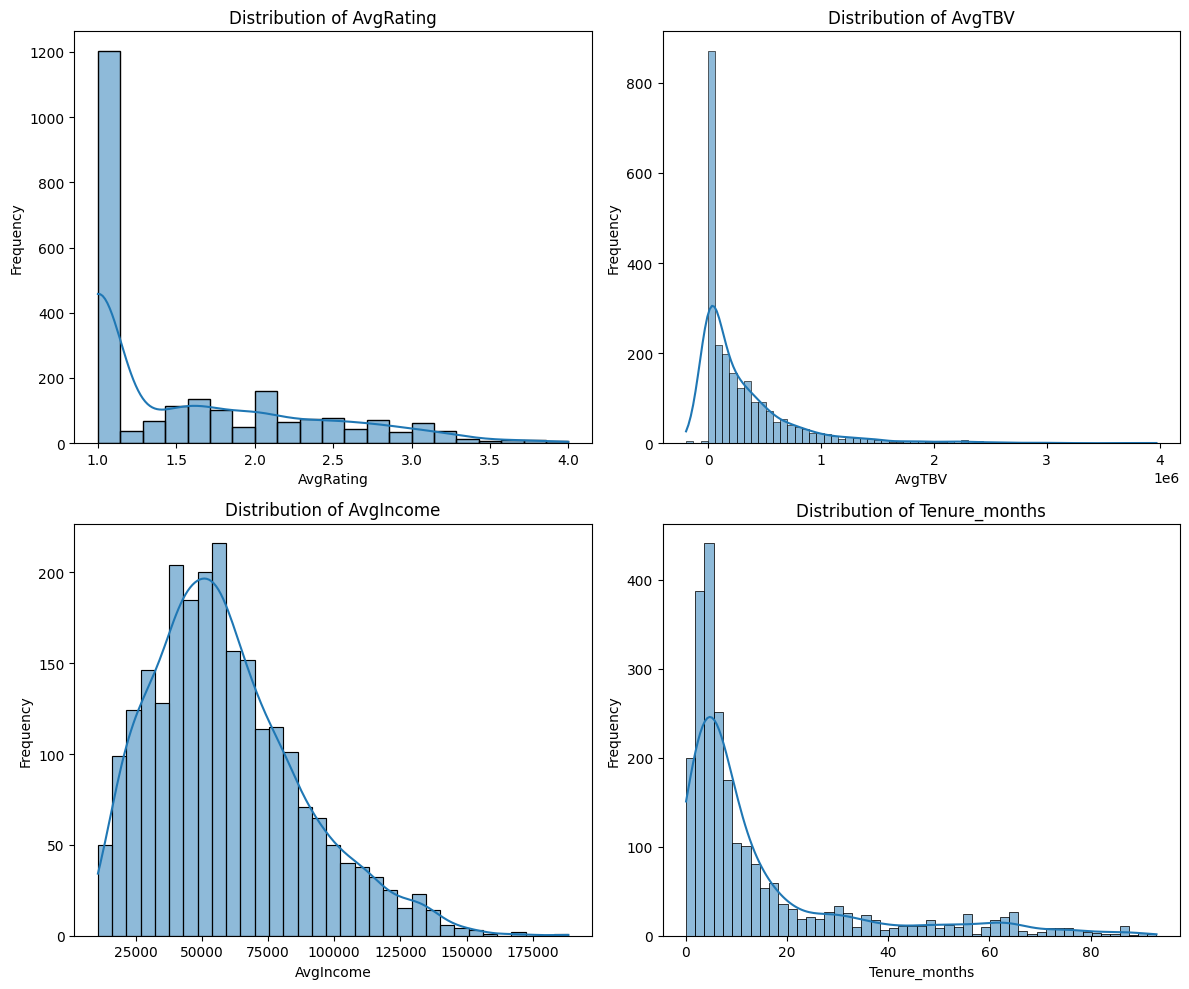

In [222]:
cont_cols = ['AvgRating', 'AvgTBV', 'AvgIncome', 'Tenure_months']

# Create a 2x2 subplot frame
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each column in its subplot
for i, col in enumerate(cont_cols):
    sns.histplot(driver_simple[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


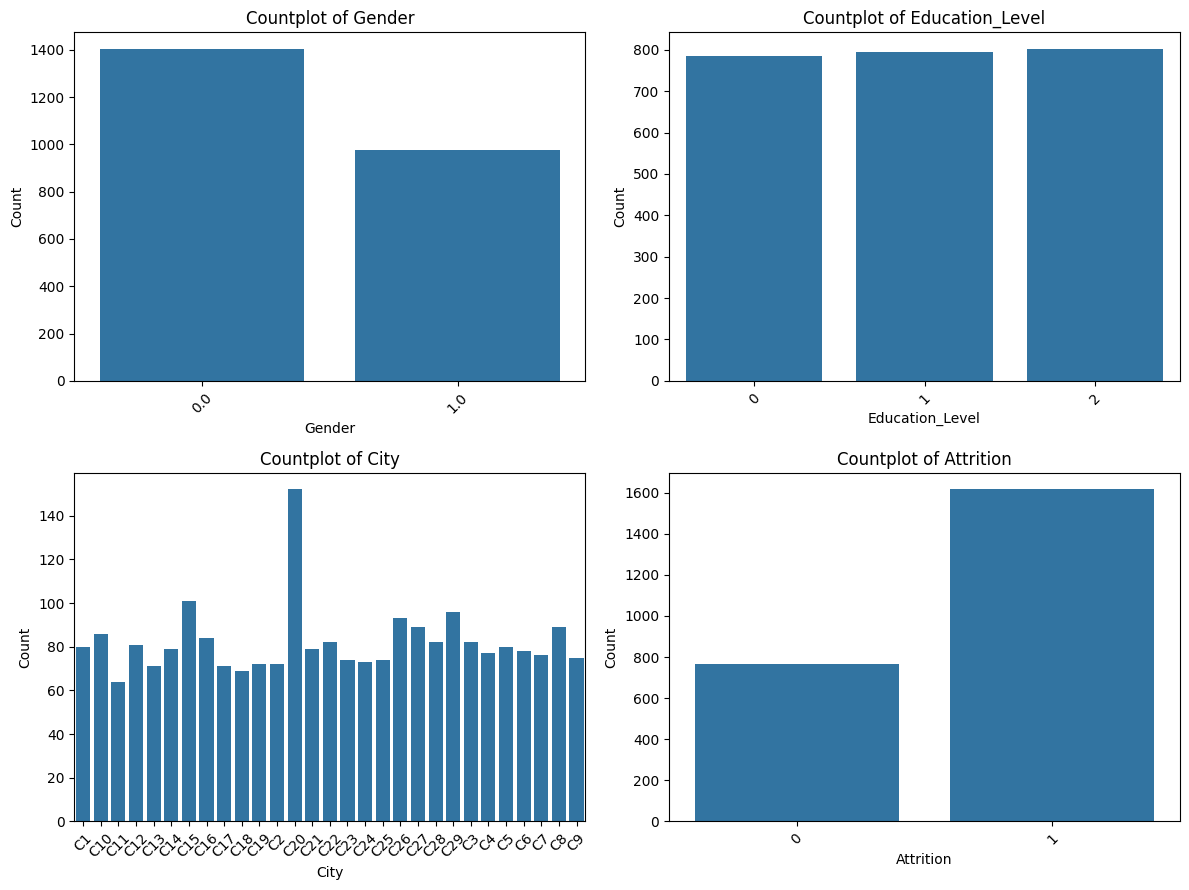

In [223]:
cat_cols = ['Gender', 'Education_Level', 'City', 'Attrition']

# Create 2x2 subplot frame
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=driver_simple[col], ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


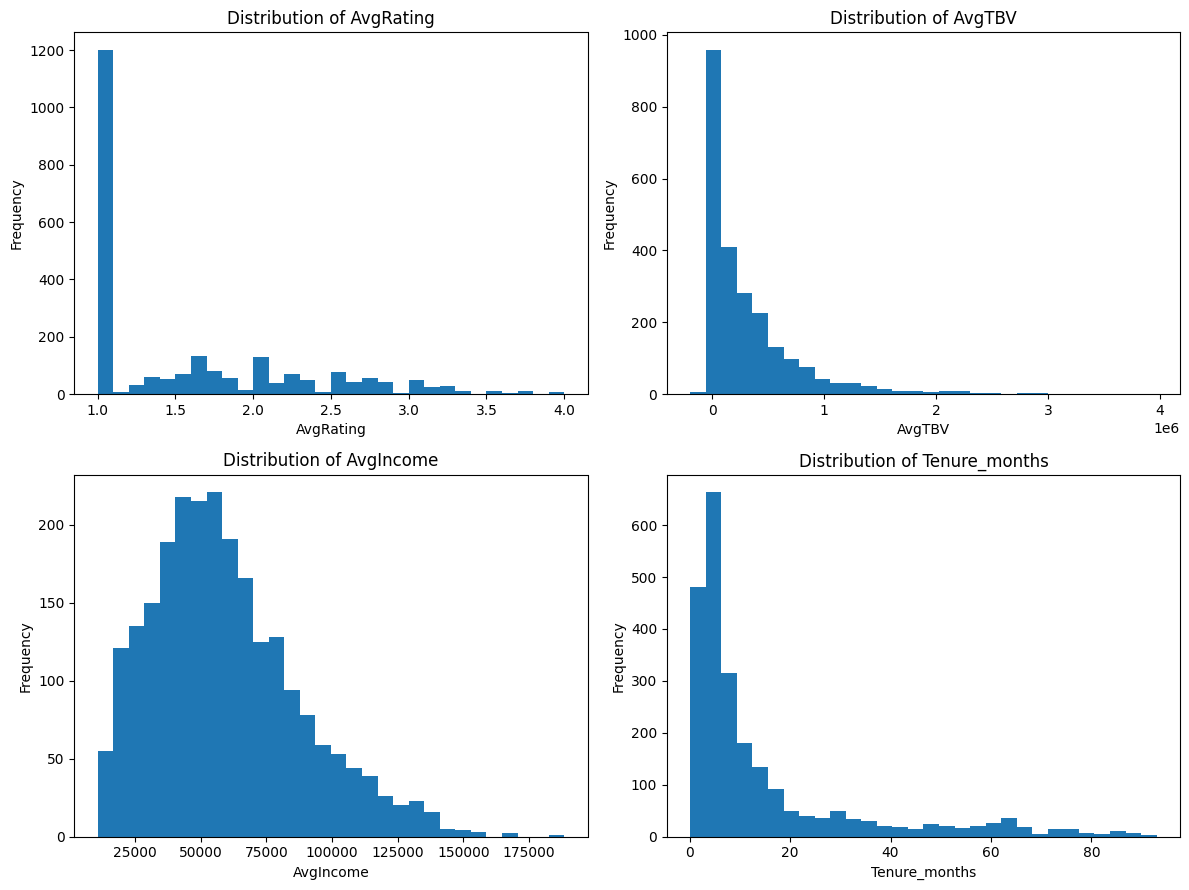

In [224]:
continuous_vars = ['AvgRating', 'AvgTBV', 'AvgIncome', 'Tenure_months']

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    ax = axes[i]
    ax.hist(driver_simple[col].dropna(), bins=30)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


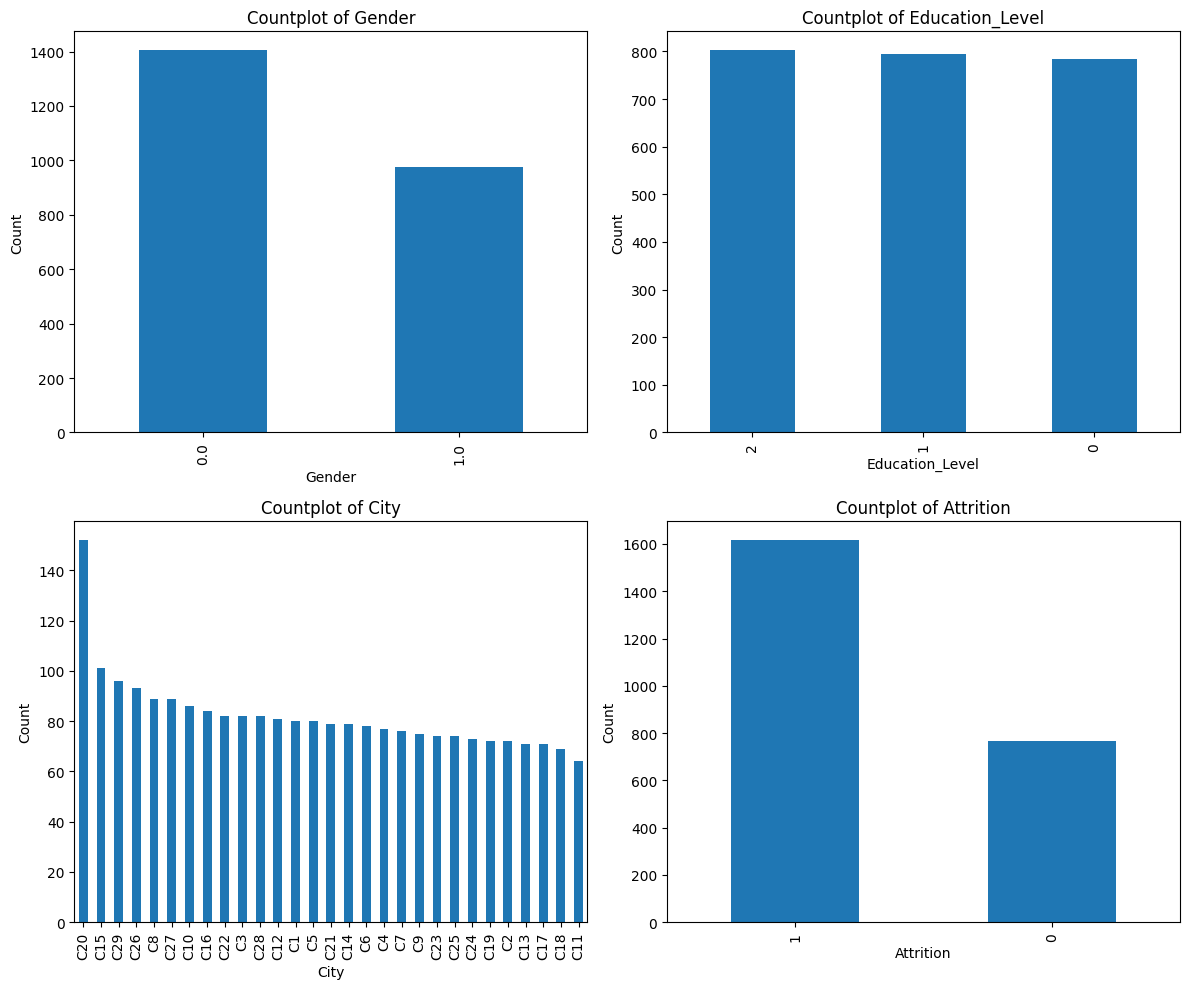

In [225]:
import matplotlib.pyplot as plt

categorical_vars = ['Gender', 'Education_Level', 'City', 'Attrition']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    ax = axes[i]
    driver_simple[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Countplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


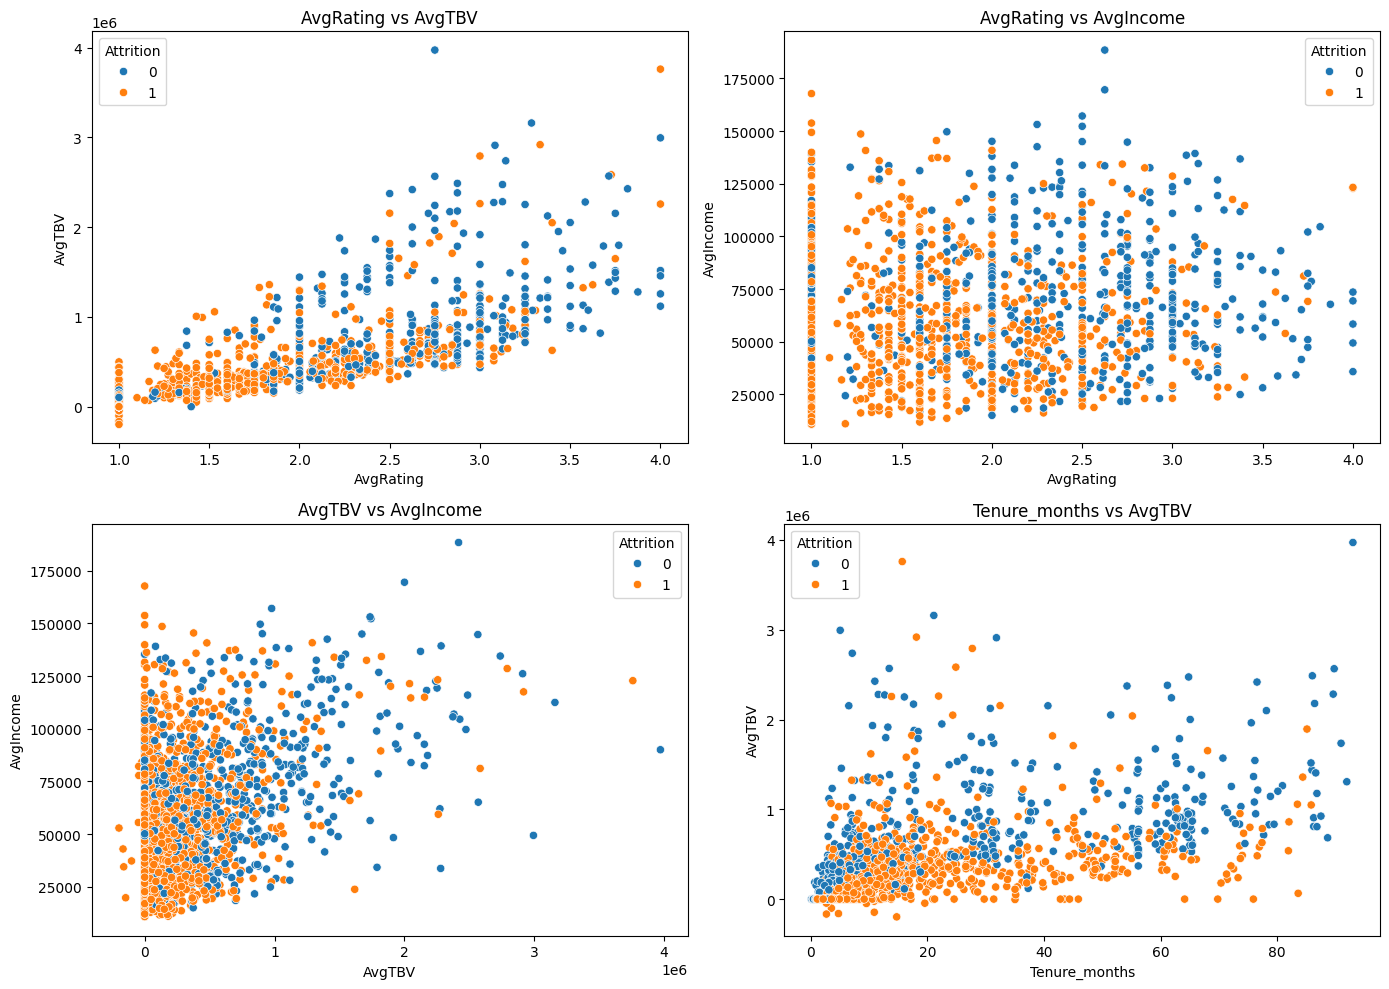

In [226]:
cont_pairs = [
    ('AvgRating', 'AvgTBV'),
    ('AvgRating', 'AvgIncome'),
    ('AvgTBV', 'AvgIncome'),
    ('Tenure_months', 'AvgTBV')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(cont_pairs):
    sns.scatterplot(data=driver_simple, x=x, y=y, hue='Attrition', ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()

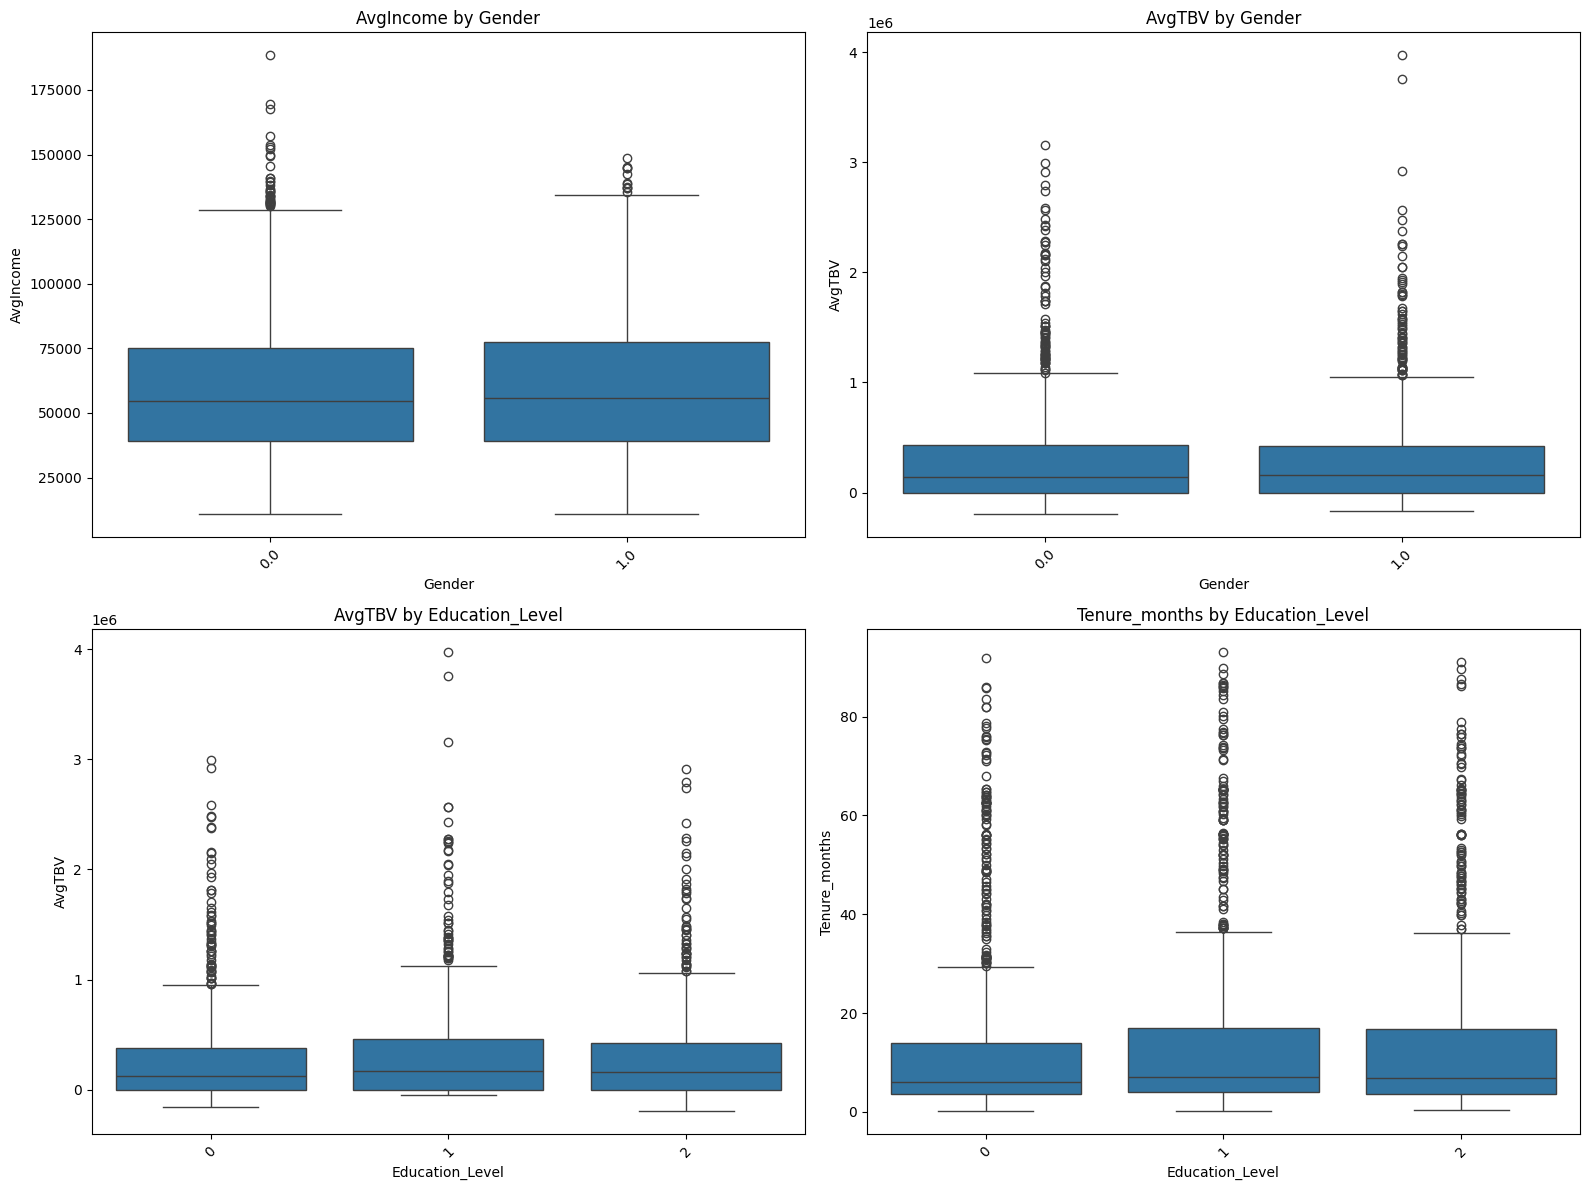

In [227]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

boxplots = [
    ('Gender', 'AvgIncome'),
    ('Gender', 'AvgTBV'),
    ('Education_Level', 'AvgTBV'),
    ('Education_Level', 'Tenure_months'),
]

for i, (cat, cont) in enumerate(boxplots):
    sns.boxplot(data=driver_simple, x=cat, y=cont, ax=axes[i])
    axes[i].set_title(f"{cont} by {cat}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


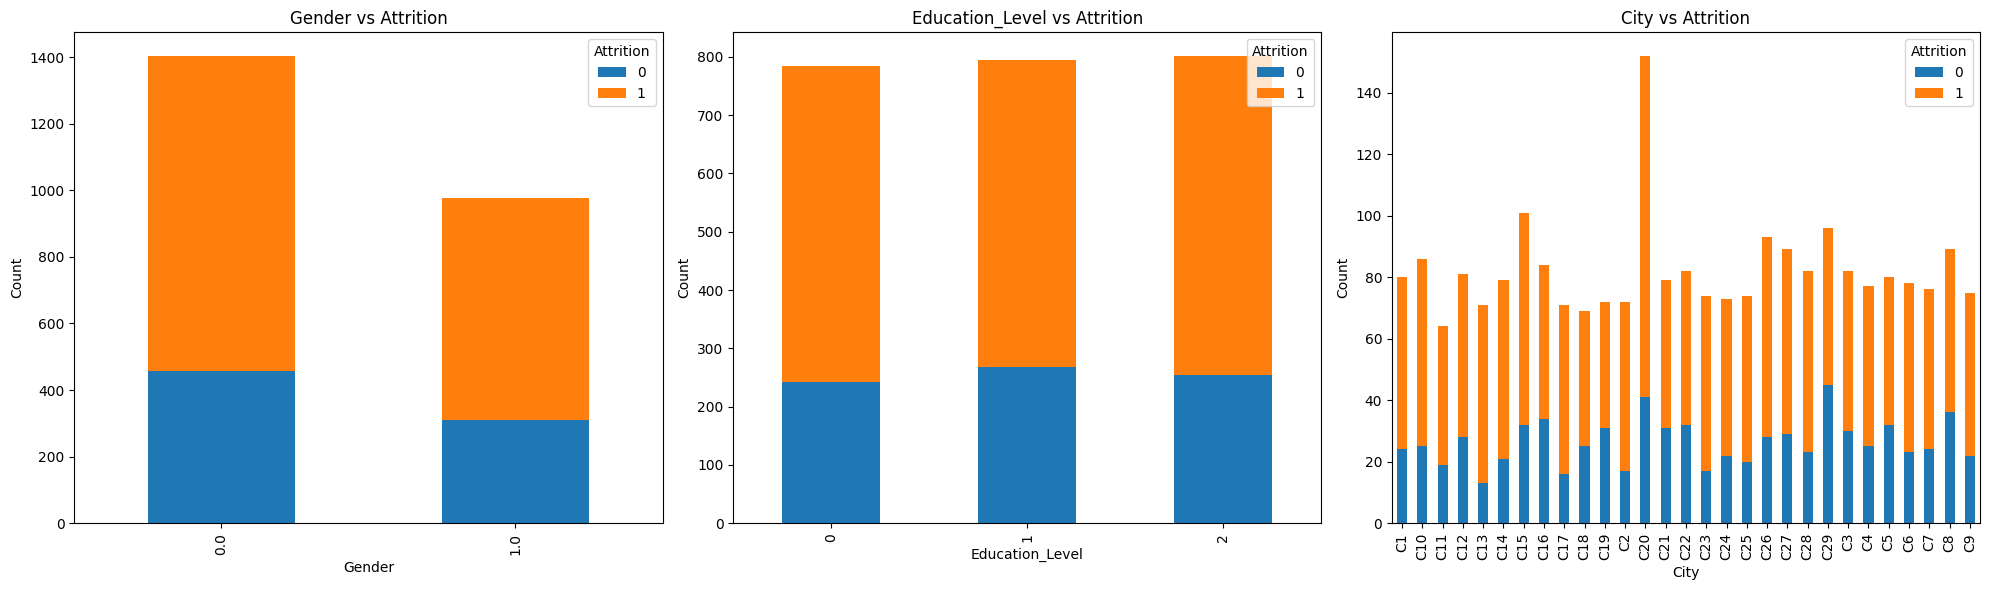

In [228]:
cat_pairs = ['Gender', 'Education_Level', 'City']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(cat_pairs):
    ct = pd.crosstab(driver_simple[col], driver_simple['Attrition'])
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Attrition')

plt.tight_layout()
plt.show()


 KEY INSIGHTS FROM CONTINUOUS–CONTINUOUS RELATIONSHIPS
1. AvgRating vs AvgTBV (Top-left plot)

Strong positive correlation

As AvgRating increases → AvgTBV increases

This makes sense: better-rated drivers get more rides.

Surprising pattern:

Attrited drivers (orange) are mostly clustered in the lower TBV range, even if rating is okay.

Very few high-rating, high-TBV drivers attrited.

Insight:

 High-performing, high-rated drivers almost never leave.
 Churn is concentrated among low TBV + low rating clusters.

2. AvgRating vs AvgIncome (Top-right plot)

Very weak correlation

Ratings don't strongly impact income.

Income ranges widely even for same ratings.

Surprising:

Attrited drivers are heavily mixed across income levels.

Income alone is NOT a strong predictor of churn.

Insight:

 Rating does not influence income as much as expected.
 Income is not a clear driver of attrition in your data.

3. AvgTBV vs AvgIncome (Bottom-left)

Moderate positive correlation

As business value increases → income also increases
(but with huge noise)

Surprising:

Both attriters and non-attriters overlap almost perfectly.

Low-income drivers (bottom zone) show slightly more attrition, but not dramatically.

Insight:

 TBV and Income are related but noisy.
 Income isn't a primary churn driver on its own.

4. Tenure_months vs AvgTBV (Bottom-right)

Extremely important pattern

Drivers with low tenure (<10 months) have very low TBV

Attrition is MUCH higher for low-tenure drivers

Long-tenure drivers (>20 months) produce:

Higher TBV

Lower attrition

Surprising:

Some long-tenure drivers still have low TBV → odd cases

But almost no high-TBV drivers attrited.

Insight (biggest one):

 Tenure + TBV together form a powerful churn indicator.
 New drivers who fail to produce business leave quickly.

 KEY INSIGHTS FROM CATEGORICAL–CATEGORICAL RELATIONSHIPS
5. Gender vs Attrition

Gender distribution is balanced, but attrition is similar in both.

No visible gender bias.

Insight:

 Gender does not significantly influence churn.

6. Education_Level vs Attrition

All three education levels show similar attrition patterns.

No surprising gaps.

Insight:

 Education level does not predict attrition.

7. City vs Attrition (This is important)

Each city has its own churn behavior.

One city (C20 or similar) has very high attrition counts.

Some cities consistently show higher orange bars (attrition).

Surprising:

Churn is NOT evenly distributed across cities.

One or two cities may be operationally problematic.

Insight:

 City is a strong categorical predictor for attrition.
 Some cities have structurally high churn — need operational or policy intervention.




In [229]:
continuous_vars = ['AvgRating', 'AvgTBV', 'AvgIncome', 'Tenure_months']

outlier_summary = {}

for col in continuous_vars:
    Q1 = driver_simple[col].quantile(0.25)
    Q3 = driver_simple[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = driver_simple[(driver_simple[col] < lower_bound) | (driver_simple[col] > upper_bound)]

    outlier_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "LowerBound": lower_bound,
        "UpperBound": upper_bound,
        "OutlierCount": len(outliers)
    }

pd.DataFrame(outlier_summary).T


,Q1,Q3,IQR,LowerBound,UpperBound,OutlierCount
AvgRating,1.000000,2.00000,1.000000,-0.50000,3.500000e+00,28.0
AvgTBV,0.000000,429498.75000,429498.750000,-644248.12500,1.073747e+06,148.0
AvgIncome,39104.000000,75835.00000,36731.000000,-15992.50000,1.309315e+05,47.0
Tenure_months,3.745072,16.09724,12.352168,-14.78318,3.462549e+01,308.0


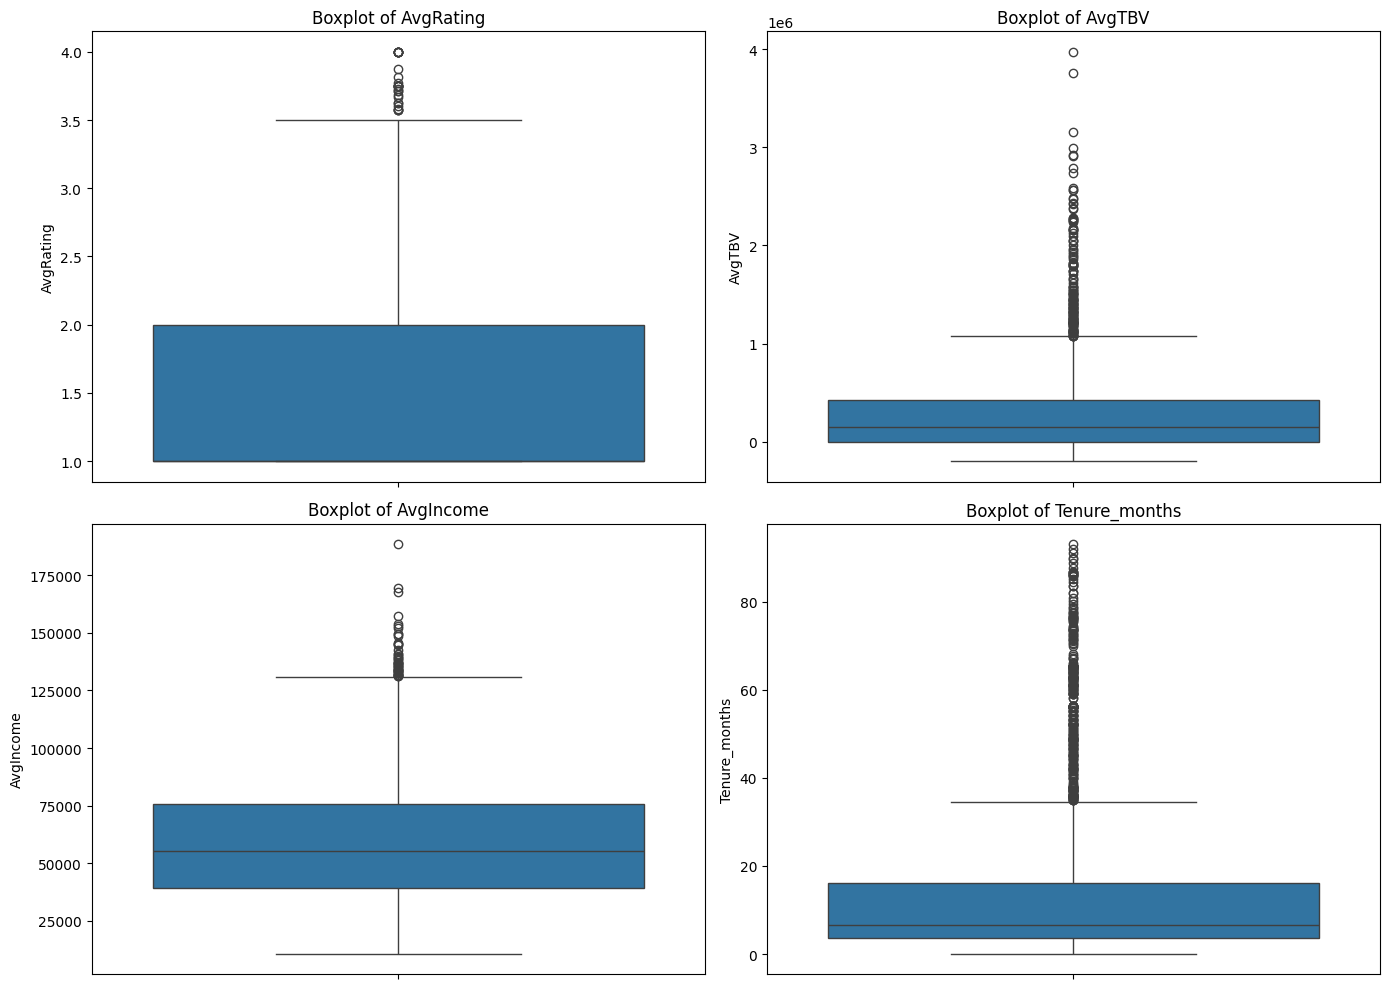

In [230]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.boxplot(data=driver_simple, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

 1. Skewness of Continuous Variables

Based on your histograms + scatter patterns from earlier:

1. AvgRating — Distribution

Skewness:

Mild right skew (more values on the lower side).

Most ratings lie between 1.2 and 2.5

Few drivers have higher ratings (3.5–4.0).

Interpretation:

Majority of drivers are average performers.

High-rated drivers are rare (long tail).

2. AvgTBV — Distribution

Skewness:

Strong right skew (heavily skewed)

Large cluster between 0 to 300k

Long tail up to 2M–4M TBV.

Interpretation:

A few drivers contribute disproportionately more business.

This is typical for gig platforms (Pareto principle).

3. AvgIncome — Distribution

Skewness:

Moderate right skew

Most income values are between 10k to 70k

High earners (100k–180k) form a long tail.

Interpretation:

Income inequality among drivers.

High performers earn a lot more.

4. Tenure_months — Distribution

Skewness:

Strong right skew

Many new drivers (0–15 months)

Fewer long-tenure drivers (40–90 months)

Interpretation:

Gig drivers churn early if they are unhappy.

Long-tenure drivers are a small, loyal group.

 2. Continuous–Continuous Relationship Insights

Using your scatterplots, here are detailed observations:

1. AvgRating vs AvgTBV

Correlation: Strong positive correlation

Higher rating → Higher TBV

Clusters:

A tight cluster of low-rating, low-TBV drivers

A smaller cluster of high-rating, high-TBV drivers

Attrition pattern:

Attriters (orange) mostly fall in low TBV cluster

Very few attriters in the high TBV region

Interpretation:
 Better drivers do more business and churn less.

2. AvgRating vs AvgIncome

Correlation: Very weak positive correlation

Rating does not translate strongly to income

Income varies widely for same rating

Clusters:

Large vertical spread

No visible separation between churners & non-churners

Interpretation:
 Rating doesn’t strongly control income on your platform.
 But low-ratings still align with low TBV → churn risk indirectly.

3. AvgTBV vs AvgIncome

Correlation: Moderate positive correlation

Higher business → Generally higher income

But with heavy noise

Clusters:

Huge dense cluster at low TBV–low income

Few very high TBV–high income performers

Attrition pattern:

Low income + low TBV → more churn

High performers almost never churn

Interpretation:
 TBV is more reliable predictor of churn than income.

4. Tenure_months vs AvgTBV

Correlation: Weak–moderate positive correlation

More tenure → slightly higher TBV

Many new drivers with very low TBV

Clusters:

New drivers (0–10 months) mostly low TBV

Some long-tenure outliers with very high TBV

Attrition pattern:

New drivers churn far more

High tenure + high TBV drivers rarely churn

Interpretation:
Tenure is a strong churn indicator.
New drivers with no traction leave early.

 3. Categorical–Categorical Observations

From your stacked bars:

Gender vs Attrition

Balanced distribution

No strong difference between genders

 Not a useful churn feature.

Education vs Attrition

Almost identical attrition rates across levels

 Education level not impactful.

City vs Attrition

Very important:

Several cities have much higher attrition

One city (C20-ish) has a big spike

Some cities are consistently high churners

 City is a strong churn predictor
City-level operational issues likely exist

 Key Takeaways (Insights + Business Meaning)
Strong churn predictors:

AvgTBV → Low business = high churn

Tenure → New drivers churn early

City → Certain locations have high churn

AvgRating (indirectly through TBV)

 Weak predictors:

AvgIncome (too noisy)

Gender

Education

Patterns & Behaviors:

Low performers churn far more

High performers (high TBV, high rating) almost never churn

Tenure and TBV together strongly define churn clusters

Some cities are severe churn hotspots

In [231]:
print("Exact duplicates:", df.duplicated().sum())

# Duplicate months for same driver
df['ReportingMonth'] = pd.to_datetime(df['ReportingMonth'], errors='coerce')

dup_months = df[df.duplicated(subset=['Driver_ID', 'ReportingMonth'], keep=False)]
print("Driver + Month duplicates:", dup_months.shape)

# Behavioral duplicates
dup_behavior = df[df.duplicated(subset=['Driver_ID', 'TotalBusinessValue', 'QuarterlyRating', 'Income'], keep=False)]
print("Behavior duplicates:", dup_behavior.shape)

# Drivers appearing too many times
driver_freq = df['Driver_ID'].value_counts()
print("Drivers with unusually high rows:", driver_freq[driver_freq > 12])


Exact duplicates: 0
Driver + Month duplicates: (0, 15)
Behavior duplicates: (5621, 15)
Drivers with unusually high rows: Driver_ID
2784    24
2753    24
2771    24
1745    24
2766    24
        ..
835     13
1579    13
856     13
2268    13
2258    13
Name: count, Length: 481, dtype: int64


In [232]:
#Now for missing values

In [233]:
df.isnull().sum().sort_values(ascending=False)


,0
LastWorkingDate,17488
Age,61
Gender,52
Driver_ID,0
City,0
Education_Level,0
ReportingMonth,0
Income,0
DateOfJoining,0
Joining Designation,0


In [234]:
driver_simple.isnull().sum().sort_values(ascending=False)


,0
Driver_ID,0
Attrition,0
AvgRating,0
AvgTBV,0
AvgIncome,0
LastActiveMonth,0
DateOfJoining,0
Gender,0
Education_Level,0
City,0


In [235]:
df['Age'] = df.groupby('City')['Age'].transform(lambda x: x.fillna(x.median()))


/tmp/ipython-input-1092891190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age'] = df.groupby('City')['Age'].transform(lambda x: x.fillna(x.median()))


In [236]:
df['Gender'] = df.groupby('City')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))


/tmp/ipython-input-2873456406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Gender'] = df.groupby('City')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))


In [237]:
df.isnull().sum().sort_values(ascending=False)

,0
LastWorkingDate,17488
Driver_ID,0
ReportingMonth,0
Gender,0
City,0
Education_Level,0
Age,0
Income,0
DateOfJoining,0
Joining Designation,0


In [238]:
#right skewed data so usinh log transformation
# Log transform skewed variables
driver_simple['AvgTBV_log'] = np.log1p(driver_simple['AvgTBV'])
driver_simple['AvgIncome_log'] = np.log1p(driver_simple['AvgIncome'])

# cap extreme tenure
driver_simple['Tenure_capped'] = driver_simple['Tenure_months'].clip(upper=60)



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [239]:
#Feature Engineering
# Low TBV  (below median)
driver_simple['Low_TBV_Flag'] = (
    driver_simple['AvgTBV'] < driver_simple['AvgTBV'].median()
).astype(int)

# New Driver Flag (tenure < 6 months)
driver_simple['New_Driver_Flag'] = (
    driver_simple['Tenure_months'] < 6
).astype(int)

# High Rating Flag
driver_simple['High_Rating_Flag'] = (
    driver_simple['AvgRating'] >= 3.5
).astype(int)

# Low Income Flag
driver_simple['Low_Income_Flag'] = (
    driver_simple['AvgIncome'] < driver_simple['AvgIncome'].median()
).astype(int)

# Negative TBV Flag
driver_simple['Negative_TBV_Flag'] = (
    driver_simple['AvgTBV'] < 0
).astype(int)

# Senior Low Performer Flag (tenure >12 months & low TBV)
driver_simple['Senior_Low_Performer_Flag'] = (
    (driver_simple['Tenure_months'] > 12) &
    (driver_simple['AvgTBV'] < driver_simple['AvgTBV'].median())
).astype(int)

#  CITY-BASED


# Identify high-churn cities
city_churn_rate = driver_simple.groupby('City')['Attrition'].mean()
high_churn_cities = city_churn_rate[city_churn_rate > city_churn_rate.mean()].index

# High churn city flag
driver_simple['High_Churn_City_Flag'] = (
    driver_simple['City'].isin(high_churn_cities)
).astype(int)


#  CONTINUOUS ENGINEERED FEATURES

# TBV per month (performance efficiency)
driver_simple['TBV_per_month'] = (
    driver_simple['AvgTBV'] / (driver_simple['Tenure_months'] + 1)
)

# Income to TBV Ratio
driver_simple['Income_TBV_Ratio'] = (
    driver_simple['AvgIncome'] / (driver_simple['AvgTBV'] + 1)
)

# Rating per month
driver_simple['Rating_per_month'] = (
    driver_simple['AvgRating'] / (driver_simple['Tenure_months'] + 1)
)


# BINNING / GROUPING FEATURES
# Tenure groups
driver_simple['Tenure_Group'] = pd.cut(
    driver_simple['Tenure_months'],
    bins=[0, 6, 12, 24, 60, 120],
    labels=['0-6m', '6-12m', '1-2y', '2-5y', '5+y'],
    include_lowest=True
)

# TBV quartile groups
driver_simple['TBV_Group'] = pd.qcut(
    driver_simple['AvgTBV'],
    q=4,
    labels=['Low', 'Med-Low', 'Med-High', 'High']
)

# Income quartile groups
driver_simple['Income_Group'] = pd.qcut(
    driver_simple['AvgIncome'],
    q=4,
    labels=['Low', 'Med-Low', 'Med-High', 'High']
)




/tmp/ipython-input-2979931429.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_churn_rate = driver_simple.groupby('City')['Attrition'].mean()


In [240]:
# DATE-RELATED FEATURE ENGINEERING
# Extract year, month from ReportingMonth
driver_simple['Reporting_Year'] = driver_simple['LastActiveMonth'].dt.year
driver_simple['Reporting_Month'] = driver_simple['LastActiveMonth'].dt.month

# Extract year of joining
driver_simple['Joining_Year'] = driver_simple['DateOfJoining'].dt.year
driver_simple['Joining_Month'] = driver_simple['DateOfJoining'].dt.month

# Driver seasons (Quarter)
driver_simple['Reporting_Quarter'] = driver_simple['LastActiveMonth'].dt.quarter

# Working duration in years
driver_simple['Tenure_years'] = driver_simple['Tenure_months'] / 12

# Year of attrition (only for attrited drivers)
driver_simple['Attrition_Year'] = driver_simple['LastActiveMonth'].dt.year.where(driver_simple['Attrition'] == 1, None)

# GEOLOCATION / CITY-BASED FEATURES

# City frequency (popularity / driver volume)
city_driver_count = driver_simple['City'].value_counts()
driver_simple['City_Driver_Count'] = driver_simple['City'].map(city_driver_count)

# City churn rate
city_churn_rate = driver_simple.groupby('City')['Attrition'].mean()
driver_simple['City_Churn_Rate'] = driver_simple['City'].map(city_churn_rate)

# City performance: average TBV
city_tbv_avg = driver_simple.groupby('City')['AvgTBV'].mean()
driver_simple['City_Avg_TBV'] = driver_simple['City'].map(city_tbv_avg)

# City rating behavior
city_rating_avg = driver_simple.groupby('City')['AvgRating'].mean()
driver_simple['City_Avg_Rating'] = driver_simple['City'].map(city_rating_avg)


/tmp/ipython-input-2475032499.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_churn_rate = driver_simple.groupby('City')['Attrition'].mean()
/tmp/ipython-input-2475032499.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_tbv_avg = driver_simple.groupby('City')['AvgTBV'].mean()
/tmp/ipython-input-2475032499.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_rating_avg = driver_simple.groupby('City

In [241]:
age_map = df.groupby("Driver_ID")['Age'].first()
driver_simple['Age'] = driver_simple['Driver_ID'].map(age_map)


In [242]:
driver_simple['Age'] = pd.to_numeric(driver_simple['Age'], errors='coerce')

driver_simple['Age_Group'] = pd.cut(
    driver_simple['Age'],
    bins=[0, 30, 50, 100],
    labels=['Young', 'Middle-aged', 'Senior'],
    include_lowest=True
)


In [243]:
# Date is sorted for correct difference calculations
df = df.sort_values(by=['Driver_ID', 'ReportingMonth'])
# RATING TREND FEATURES
#  Rating change from first to last month
rating_change = df.groupby('Driver_ID')['QuarterlyRating'].agg(
    Rating_First='first',
    Rating_Last='last'
)
rating_change['Rating_Change'] = rating_change['Rating_Last'] - rating_change['Rating_First']

#  Rating volatility (consistency measure)
rating_vol = df.groupby('Driver_ID')['QuarterlyRating'].std().rename('Rating_Volatility')

#  TBV TREND FEATURES


tbv_change = df.groupby('Driver_ID')['TotalBusinessValue'].agg(
    TBV_First='first',
    TBV_Last='last'
)
tbv_change['TBV_Change'] = tbv_change['TBV_Last'] - tbv_change['TBV_First']

# TBV standard deviation (volatility)
tbv_vol = df.groupby('Driver_ID')['TotalBusinessValue'].std().rename('TBV_Volatility')

# INCOME TREND FEATURES


income_change = df.groupby('Driver_ID')['Income'].agg(
    Inc_First='first',
    Inc_Last='last'
)
income_change['Income_Change'] = income_change['Inc_Last'] - income_change['Inc_First']

# Income volatility
income_vol = df.groupby('Driver_ID')['Income'].std().rename('Income_Volatility')


 #"RIDE FREQUENCY" PROXY USING TBV CHANGES


# Using TBV as a proxy for ride frequency
ride_freq = df.groupby('Driver_ID')['TotalBusinessValue'].count().rename('Active_Months')

# Monthly TBV mean / std
ride_freq_features = df.groupby('Driver_ID')['TotalBusinessValue'].agg(
    TBV_Mean='mean',
    TBV_Std='std'
)

# ------------------------------------------------------
# 5. MERGE ALL FEATURES INTO driver_simple
# ------------------------------------------------------

driver_simple = driver_simple.merge(rating_change, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(rating_vol, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(tbv_change, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(tbv_vol, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(income_change, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(income_vol, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(ride_freq, on='Driver_ID', how='left')
driver_simple = driver_simple.merge(ride_freq_features, on='Driver_ID', how='left')

#  CLEANUP

# Fill NaN volatility values (drivers active only 1 month → std = NaN)
for col in ['Rating_Volatility', 'TBV_Volatility', 'Income_Volatility', 'TBV_Std']:
    driver_simple[col] = driver_simple[col].fillna(0)

# Replace Active_Months NaN
driver_simple['Active_Months'] = driver_simple['Active_Months'].fillna(0)




In [244]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = [
    'Education_Level',      # 0 < 1 < 2
    'Tenure_Group',         # 0-6m < 6-12m < 1-2y < ...
    'TBV_Group',            # Low < Med-Low < Med-High < High
    'Income_Group',         # Low < ML < MH < High
    'Age_Group'             # Young < Middle-aged < Senior
]

# Ensure these columns exist before encoding
existing_ordinal_cols = [col for col in ordinal_cols if col in driver_simple.columns]

ord_enc = OrdinalEncoder()
driver_simple[existing_ordinal_cols] = ord_enc.fit_transform(driver_simple[existing_ordinal_cols])


#  ONE-HOT ENCODING

nominal_cols = [
    'Gender',               # Male/Female
    'Joining_Month',        # 1–12
    'Reporting_Month'       # 1–12
]

existing_nominal_cols = [col for col in nominal_cols if col in driver_simple.columns]

driver_simple = pd.get_dummies(
    driver_simple,
    columns=existing_nominal_cols,
    drop_first=True
)


#  TARGET ENCODING

if 'City' in driver_simple.columns:

    city_mean = driver_simple.groupby('City')['Attrition'].mean()
    global_mean = driver_simple['Attrition'].mean()

    smoothing = 10  # α: higher = more weight to global mean

    driver_simple['City_Target_Enc'] = (
        (city_mean[driver_simple['City']] * smoothing + global_mean) /
        (smoothing + 1)
    ).values

    # drop original City column
    driver_simple.drop(columns=['City'], inplace=True)




import numpy as np

skewed_cols = ['AvgTBV', 'AvgIncome']

for col in skewed_cols:
    if col in driver_simple.columns:
        driver_simple[col + '_log'] = np.log1p(driver_simple[col])




/tmp/ipython-input-2074242187.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_mean = driver_simple.groupby('City')['Attrition'].mean()
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# EDA insights
1. Churn is mainly economic.
      Drivers leave early if TBV and Income are low.
2. Tenure is extremely important.
      Most churn happens within the first 6 months.
3. TBV and Income are the strongest predictors.
4. City-level differences matter.
  Some cities consistently produce high churn drivers.
5. Rating is a secondary predictor, not primary.

In [245]:
join_month_cols = [col for col in driver_simple.columns if col.startswith('Joining_Month_')]

driver_simple['Joining_Month'] = (
    driver_simple[join_month_cols]
    .idxmax(axis=1)
    .str.extract('(\d+)')
    .astype(float)
)

driver_simple['Joining_Month'] = driver_simple['Joining_Month'].fillna(1).astype(int)

report_month_cols = [col for col in driver_simple.columns if col.startswith('Reporting_Month_')]

driver_simple['Reporting_Month'] = (
    driver_simple[report_month_cols]
    .idxmax(axis=1)
    .str.extract('(\d+)')
    .astype(float)
)

driver_simple['Reporting_Month'] = driver_simple['Reporting_Month'].fillna(1).astype(int)

clean_df = driver_simple[keep_features].copy()

print("Final clean_df shape:", clean_df.shape)


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1338556795.py:6: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')
/tmp/ipython-input-1338556795.py:17: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


Final clean_df shape: (2381, 30)


In [246]:
keep_features = [
    # Target
    'Attrition',
    # Core performance metrics
    'AvgRating',
    'AvgTBV_log',
    'AvgIncome_log',
    'TBV_per_month',
    'Income_TBV_Ratio',
    'Rating_per_month',
    'Rating_Change',
    'TBV_Change',
    'Income_Change',
    # Tenure-related
    'Tenure_months',
    'Tenure_capped',
    'Tenure_years',
    'Tenure_Group',
    # Income/TBV groups
    'TBV_Group',
    'Income_Group',
    # Age
    'Age',
    'Age_Group',
    # Behavioral Flags
    'Low_TBV_Flag',
    'New_Driver_Flag',
    'High_Rating_Flag',
    'Low_Income_Flag',
    'Negative_TBV_Flag',
    'Senior_Low_Performer_Flag',
    'High_Churn_City_Flag',
    # City target encoding
    'City_Target_Enc',
    # Demographics
    'Education_Level',
    'Gender_1.0',
    # Seasonal / time features
    'Joining_Month',
    'Reporting_Month'
]

clean_df = driver_simple[keep_features].copy()

print("Final shape:", clean_df.shape)
clean_df.head()


y = clean_df['Attrition']
X = clean_df.drop(columns=['Attrition'])

print("X shape:", X.shape)
print("y shape:", y.shape)



Final shape: (2381, 30)
X shape: (2381, 29)
y shape: (2381,)


In [247]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting class distribution:")
print(y_test.value_counts(normalize=True))

# RF model bagging

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_tree = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

bag_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=200,
    max_samples=0.8,
    max_features=1.0,
    n_jobs=-1,
    random_state=42
)

bag_model.fit(X_train, y_train)

Training class distribution:
Attrition
1    0.678571
0    0.321429
Name: proportion, dtype: float64

Testing class distribution:
Attrition
1    0.679245
0    0.320755
Name: proportion, dtype: float64


BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  max_samples=0.8, n_estimators=200, n_jobs=-1,
                  random_state=42)

In [248]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = bag_model.predict(X_test)
y_proba = bag_model.predict_proba(X_test)[:,1]

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



CONFUSION MATRIX:
[[143  10]
 [ 17 307]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       153
           1       0.97      0.95      0.96       324

    accuracy                           0.94       477
   macro avg       0.93      0.94      0.94       477
weighted avg       0.94      0.94      0.94       477

ROC-AUC Score: 0.9766803840877916


In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'n_estimators': [200, 300, 400, 500, 700],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,                 # tries 40 combinations
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
print("Best RF Params:", rf_search.best_params_)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best RF Params: {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': None, 'bootstrap': True}


In [250]:
best_rf = RandomForestClassifier(
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=0.3,
    max_depth=None,
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("\nFinal Tuned RF Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nFinal Tuned RF Classification Report:")
print(classification_report(y_test, y_pred))

print("Final Tuned RF ROC-AUC:", roc_auc_score(y_test, y_proba))



Final Tuned RF Confusion Matrix:
[[147   6]
 [ 23 301]]

Final Tuned RF Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       153
           1       0.98      0.93      0.95       324

    accuracy                           0.94       477
   macro avg       0.92      0.94      0.93       477
weighted avg       0.94      0.94      0.94       477

Final Tuned RF ROC-AUC: 0.976236585169047


Now doing boosting

In [251]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

hgb = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=6,
    max_iter=300,
    random_state=42,
    l2_regularization=0.0
)

hgb.fit(X_train, y_train)

# Predictions
y_pred = hgb.predict(X_test)
y_proba = hgb.predict_proba(X_test)[:,1]

print("\nHistGradientBoosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nHistGradientBoosting Classification Report:")
print(classification_report(y_test, y_pred))

print("HistGradientBoosting ROC-AUC Score:", roc_auc_score(y_test, y_proba))




HistGradientBoosting Confusion Matrix:
[[142  11]
 [ 21 303]]

HistGradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.96      0.94      0.95       324

    accuracy                           0.93       477
   macro avg       0.92      0.93      0.92       477
weighted avg       0.93      0.93      0.93       477

HistGradientBoosting ROC-AUC Score: 0.9718792866941015


Performing XGboot


In [252]:
neg = y_train.value_counts()[0]
pos = y_train.value_counts()[1]
scale = neg / pos
print("scale_pos_weight =", scale)


scale_pos_weight = 0.47368421052631576


In [253]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1.0,
    reg_alpha=0.0,
    scale_pos_weight=scale,   # HANDLE IMBALANCE
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [254]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba))


XGBoost Confusion Matrix:
[[143  10]
 [ 22 302]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.97      0.93      0.95       324

    accuracy                           0.93       477
   macro avg       0.92      0.93      0.92       477
weighted avg       0.94      0.93      0.93       477

XGBoost ROC-AUC Score: 0.9721011861534737


Trying LightGBM

In [255]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:,1]

print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

print("LightGBM ROC-AUC Score:", roc_auc_score(y_test, y_proba_lgb))


[LightGBM] [Info] Number of positive: 1292, number of negative: 612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2515
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

LightGBM Confusion Matrix:
[[143  10]
 [ 20 304]]

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       153
           1       0.97      0.94      0.95       324

    accuracy                           0.94       477
   macro avg       0.92      0.94      0.93       477
weighted avg       0.94      0.94      0.94       477

LightGBM ROC-AUC Score: 0.972565157

In [256]:
lgb = LGBMClassifier(
    class_weight='balanced',
    objective='binary',
    random_state=42
)

param_dist_lgb = {
    'num_leaves': [15, 31, 50, 70, 120],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [300, 500, 700, 900],
    'min_child_samples': [5, 10, 20, 30, 50],
    'min_child_weight': [0.01, 0.1, 1, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1, 5],
    'bagging_freq': [1, 3, 5],
    'max_bin': [63, 127, 255]
}

lgb_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist_lgb,
    n_iter=40,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

lgb_search.fit(X_train, y_train)
print("Best LightGBM Params:", lgb_search.best_params_)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 1292, number of negative: 612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [257]:
best_lgb_model = LGBMClassifier(
    class_weight='balanced',
    objective='binary',
    subsample=0.9,
    reg_lambda=0.1,
    reg_alpha=0,
    num_leaves=31,
    n_estimators=300,
    min_child_weight=0.01,
    min_child_samples=50,
    max_depth=5,
    max_bin=255,
    learning_rate=0.01,
    colsample_bytree=0.6,
    bagging_freq=5,
    random_state=42
)

best_lgb_model.fit(X_train, y_train)

y_pred_lgb = best_lgb_model.predict(X_test)
y_proba_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

print("\nOptimized LightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nOptimized LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

print("Optimized LightGBM ROC-AUC:", roc_auc_score(y_test, y_proba_lgb))


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 1292, number of negative: 612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LightGBM produces fewer false alarms (best for cost savings)

Random Forest catches more churners (better recall)

In [258]:
# Get feature importance values
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to dataframe
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(20))   # Print top 20


                 Feature  Importance
22       Reporting_Month   30.843609
7             TBV_Change    6.366096
1             AvgTBV_log    1.917163
6          Rating_Change    1.771037
5       Rating_per_month    1.724101
0              AvgRating    1.723354
21         Joining_Month    1.379988
9          Tenure_capped    1.341529
8          Tenure_months    1.194945
11          Tenure_Group    1.079469
20            Gender_1.0    0.983387
13          Income_Group    0.937228
2          AvgIncome_log    0.901340
16       Low_Income_Flag    0.859346
17  High_Churn_City_Flag    0.847178
3          TBV_per_month    0.838206
4       Income_TBV_Ratio    0.825728
19       Education_Level    0.798671
18       City_Target_Enc    0.796813
10          Tenure_years    0.795265


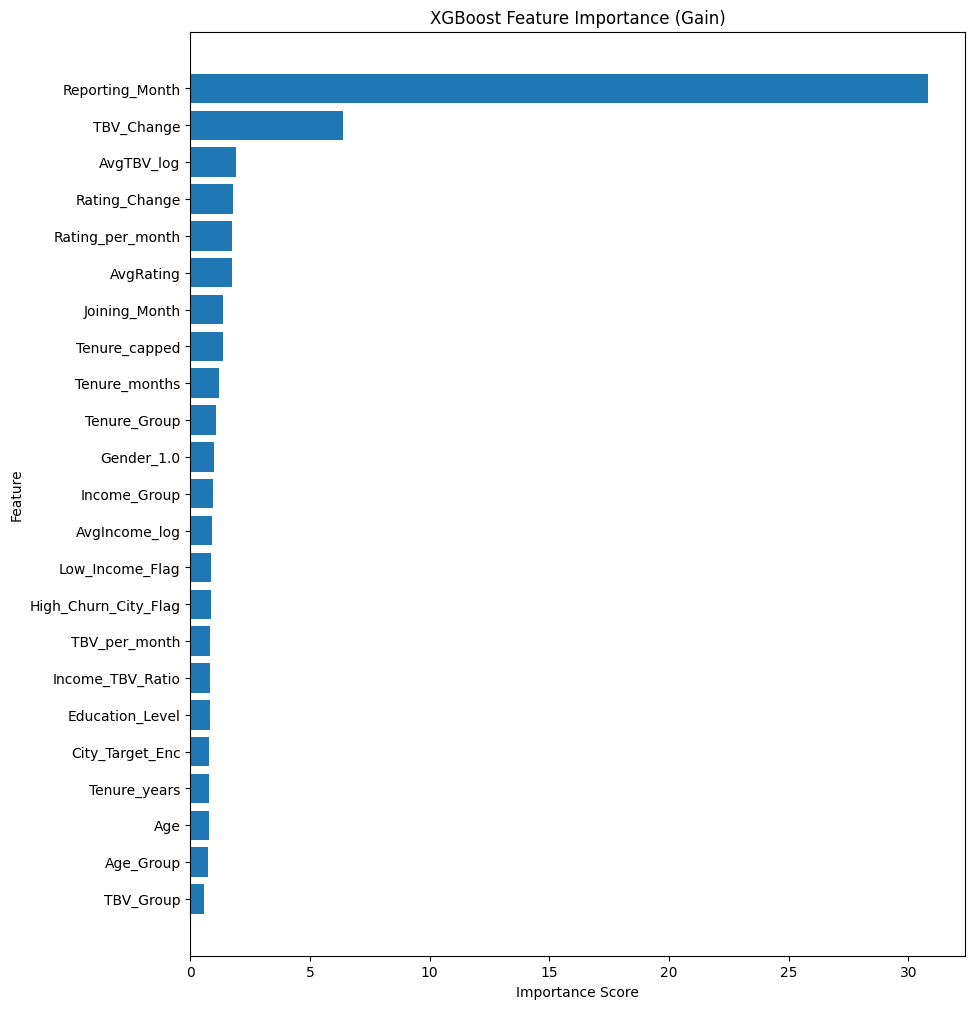

In [259]:
plt.figure(figsize=(10, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()     # Highest importance at the top
plt.title("XGBoost Feature Importance (Gain)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


**Insights and recommendation:**
Reporting_Month (30.84 importance) :MASSIVE INFLUENCE
Certain months dramatically increase churn probability, e.g.:

Slow business months → drivers churn more

Bad weather → lower rides → dissatisfied drivers

Before festive season → drivers switch to temporary jobs

This indicates Ola must adjust incentives seasonally.


TBV_Change (6.36 importance)
If a driver’s business value drops suddenly, churn probability increases.
Negative TBV_Change = very high churn risk

Large positive change = loyal drivers

Ola must detect earning drops early and intervene

AvgTBV_log (1.91)
Drivers with low average business value (low earnings) churn more.

Rating_Change (1.77)
If a driver’s ratings drop over time, churn likelihood increases.
Ola should monitor drivers with falling ratings.
Rating_per_month (1.72) & AvgRating (1.72)
Drivers with customer complaints or poor experiences typically churn sooner.
Joining_Month (1.38 )
The month the driver joined significantly affects long-term retention.
Seasonality in onboarding:

Drivers joining in slow demand months churn faster
Drivers joining during festival/incentive months stay longer
Important for recruitment planning.


Tenure (1.3 )
New drivers churn much more compared to experienced ones.
Retention programs must focus on new drivers.

Gender_1.0 (0.98 )
Gender impacts churn patterns (typical for ride-hailing).
Female drivers may churn differently due to safety or timing issues
Male drivers may churn due to competition in dense markets
Not a major factor but still meaningful.

Income Group (0.93)
Income level is a strong churn driver.

Influence:

Low-income group drivers = high churn

High-income group = stable

This reinforces the business value findings.

City-related features (0.79–0.84 )

Features:

High_Churn_City_Flag

City_Target_Enc

 it means: Churn patterns differ by city.

Cities with:
High congestion,
Low ride demand,
High fuel prices,
Poor incentives

tend to have significantly higher churn rates.

1. Reward Top Performers

Top drivers:

Complete more trips

Maintain high ratings

Have stable earnings (high TBV)

Rarely cancel rides

Deliver good customer experience

Address Underperformers

Underperformers often show:

Sudden TBV drops

Rating declines

Low ride acceptance

High cancellations

These are early indicators of frustration or burnout.

Ola’s goal:

Identify early signals before the driver churns

Intervene with training, targeted incentives, or support

Improve Customer Satisfaction

Drivers directly influence:

Ride quality

Safety perception

Reliability

Timeliness

Ola’s objective:

Minimize bad experiences

Improve 5-star rating share

Reduce customer complaints

Machine learning outputs help Ola:

Identify drivers whose ratings are dropping

Understand if certain cities or months see more customer dissatisfaction

Detect patterns that correlate low rating + high churn

Driver churn is a supply-side risk.

Ola needs consistent supply to:

Reduce wait times

Increase trip completion rate

Maintain surge pricing integrity

Keep customers on the platform

Your churn model helps them:

Forecast supply shortages city-wise

Time recruitment waves

Plan incentive budgets

Identify when seasonal churn is about to spike (Reporting_Month importance = 30!)

Reduce Cost of Recruitment & Training

Recruiting new drivers is expensive:

Verification

Car attaching

Training

Onboarding support

Retaining an existing driver is 10x cheaper than hiring a new one.

Challenges Faced by Drivers & Factors Affecting Their Performance

Earnings Fluctuation (TBV Change, AvgTBV)

Drivers experience:

Lean weekdays

Rainy days with cancellations

Low-demand zones

High fuel prices

These affect:

TBV

Incentive earnings

Churn risk

Your model clearly reflects:

TBV_Change is a top churn driver.

**Questionnaire (Answers should present in the text editor along
with insights):**

1. What percentage of drivers have received a quarterly rating of 5?
2. Comment on the correlation between Age and Quarterly Rating.
3. Name the city which showed the most improvement in Quarterly Rating over
the past year
4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
(T/F)
5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?
6. From Ola's perspective, which metric should be the primary focus for driver
retention?

*  ROC AUC
*  Precision
*  Recall
*  F1 Score
7. How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?
8. Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?
9. Will the driver's performance be affected by the City they operate in? (Yes/No)
10. Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?

In [261]:
#q1
pct_exact5 = (driver_simple['AvgRating'] == 5).mean() * 100
pct_rounded5 = (driver_simple['AvgRating'].round(1) == 5).mean() * 100
pct_ge_45 = (driver_simple['AvgRating'] >= 4.5).mean() * 100

print(f"Pct exactly == 5.0: {pct_exact5:.3f}%")



Pct exactly == 5.0: 0.000%


In [262]:
# Q2 (if Age exists)
driver_simple[['Age','AvgRating']].dropna().corr().iloc[0,1]


np.float64(0.16266235160917275)

positive corr

In [265]:
# Q5 (if change columns exist)
driver_simple[['Rating_Change','TBV_Change']].dropna().corr().iloc[0,1]
# For bottom decile of rating drops:
bottom10 = driver_simple['Rating_Change'].quantile(0.10)
driver_simple.loc[driver_simple['Rating_Change']<=bottom10, 'TBV_Change'].mean()


np.float64(-753327.0087336245)

'''Q6 — Which metric should Ola focus on for driver retention?

3. Recall
 For retention you want to catch as many at-risk drivers as possible (high recall),
  even if you accept some false positives. Missing churners (low recall) leads to lost drivers and higher acquisition costs.'''

Q7 — How does the gap between precision and recall affect Ola's relationships?

Business explanation (ready to use):

High recall / low precision: Ola reaches many at-risk drivers (good), but will also spend resources on false positives (costly). This may annoy drivers who receive unnecessary interventions and waste support/marketing budget.

High precision / low recall: Interventions are efficient (few false alarms), but many at-risk drivers are missed, causing preventable churn and service disruption for customers.

Recommendation: Target high recall with a tuned threshold and follow-up verification step (e.g., light automated nudge before costly incentive).

In [267]:
cands = ['AvgTBV','AvgIncome','Tenure_months','Gender','Education_Level','LastActiveMonth']
present = [c for c in cands if c in driver_simple.columns]
driver_simple[present + ['AvgRating']].dropna().corr()['AvgRating'].sort_values(ascending=False)


,AvgRating
AvgRating,1.000000
AvgTBV,0.814916
Tenure_months,0.526912
LastActiveMonth,0.316831
AvgIncome,0.187621
Education_Level,0.037169
